## Cat vs. Dog image classifier using CNN in Keras
 
### Over 92% accuracy achieved on validation dataset

### Part 1 - Building the CNN

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

C:\Users\AK\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
# Initialising the CNN
classifier = Sequential()

# Layer 1 - Convolution + Pooling + Dropout
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Adding a forth convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
__________

### Part 2 - Fitting the CNN to the images

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000/32,
                         epochs = 200,
                         validation_data = test_set,
                         validation_steps = 2000/32)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/200
250/250 [==============================] - 202s 806ms/step - loss: 0.6965 - acc: 0.4901 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 2/200
250/250 [==============================] - 216s 863ms/step - loss: 0.6934 - acc: 0.5072 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/200
250/250 [==============================] - 212s 849ms/step - loss: 0.6929 - acc: 0.5044 - val_loss: 0.6934 - val_acc: 0.4995
Epoch 4/200
250/250 [==============================] - 215s 860ms/step - loss: 0.6885 - acc: 0.5235 - val_loss: 0.6718 - val_acc: 0.5315
Epoch 5/200
250/250 [==============================] - 204s 818ms/step - loss: 0.6821 - acc: 0.5396 - val_loss: 0.6920 - val_acc: 0.5295
Epoch 6/200
250/250 [==============================] - 213s 854ms/step - loss: 0.6817 - acc: 0.5441 - val_loss: 0.6924 - val_acc: 0.4990
Epoch 7/200
250/250 [==============================] - 221s 882ms/step - loss: 0.6734 - acc: 0

Epoch 60/200
250/250 [==============================] - 208s 833ms/step - loss: 0.3268 - acc: 0.8622 - val_loss: 0.2717 - val_acc: 0.8830
Epoch 61/200
250/250 [==============================] - 214s 854ms/step - loss: 0.3246 - acc: 0.8586 - val_loss: 0.2809 - val_acc: 0.8825
Epoch 62/200
250/250 [==============================] - 210s 839ms/step - loss: 0.3319 - acc: 0.8585 - val_loss: 0.3437 - val_acc: 0.8590
Epoch 63/200
250/250 [==============================] - 208s 831ms/step - loss: 0.3314 - acc: 0.8638 - val_loss: 0.2851 - val_acc: 0.8860
Epoch 64/200
250/250 [==============================] - 209s 835ms/step - loss: 0.3236 - acc: 0.8600 - val_loss: 0.2672 - val_acc: 0.8925
Epoch 65/200
250/250 [==============================] - 207s 829ms/step - loss: 0.3258 - acc: 0.8615 - val_loss: 0.2800 - val_acc: 0.8885
Epoch 66/200
250/250 [==============================] - 208s 832ms/step - loss: 0.3097 - acc: 0.8661 - val_loss: 0.2561 - val_acc: 0.8975
Epoch 67/200
250/250 [============

250/250 [==============================] - 229s 916ms/step - loss: 0.2116 - acc: 0.9135 - val_loss: 0.2068 - val_acc: 0.9160
Epoch 179/200
250/250 [==============================] - 229s 916ms/step - loss: 0.2061 - acc: 0.9210 - val_loss: 0.2074 - val_acc: 0.9225
Epoch 180/200
250/250 [==============================] - 229s 915ms/step - loss: 0.2215 - acc: 0.9127 - val_loss: 0.1981 - val_acc: 0.9235
Epoch 181/200
250/250 [==============================] - 234s 937ms/step - loss: 0.2127 - acc: 0.9147 - val_loss: 0.2859 - val_acc: 0.8880
Epoch 182/200
250/250 [==============================] - 233s 933ms/step - loss: 0.2091 - acc: 0.9161 - val_loss: 0.1921 - val_acc: 0.9275
Epoch 183/200
250/250 [==============================] - 228s 913ms/step - loss: 0.1978 - acc: 0.9228 - val_loss: 0.1843 - val_acc: 0.9305
Epoch 184/200
250/250 [==============================] - 228s 910ms/step - loss: 0.2158 - acc: 0.9150 - val_loss: 0.1926 - val_acc: 0.9295
Epoch 185/200
250/250 [==================

In [11]:
model_backup_path = 'dataset/cat_or_dogs_model_1e.h5'
classifier.save(model_backup_path)
print("Model saved to", model_backup_path)

Model saved to dataset/cat_or_dogs_model_1e.h5


### Part 3 - Making new predictions

In [12]:
from matplotlib.pyplot import imshow
%matplotlib inline

import numpy as np
from keras.preprocessing import image

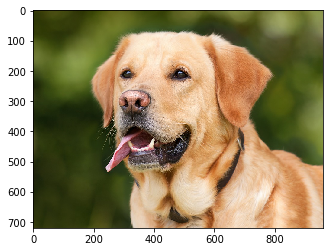

In [13]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg')
imshow(test_image)

In [14]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print(prediction)

dog


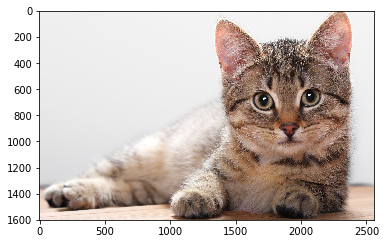

In [15]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg')
imshow(test_image)

In [16]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'   
    
print(prediction)

cat
